In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("netflix_titles.csv")
df.shape

(8807, 12)

In [4]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [5]:
df.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [8]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [11]:
df.duplicated().sum()

0

In [12]:
df_copy = df.copy()

In [13]:
df_copy = df_copy.dropna()

In [17]:
df_copy.dropna(subset = ['director'],inplace = True)

In [18]:
df_copy.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [19]:
df_copy.shape

(5332, 12)

In [25]:
country_with_most_movies = df_copy.groupby('country')['type'].apply(lambda x : (x == 'Movie').sum()).sort_values(ascending=False)
country_with_most_movies

country
United States                                     1819
India                                              868
United Kingdom                                     164
Canada                                             104
Egypt                                               90
                                                  ... 
Taiwan, Malaysia                                     0
Belgium                                              0
Philippines, Singapore, Indonesia                    0
United Kingdom, Germany, United States, France       0
Italy, Canada, France                                0
Name: type, Length: 604, dtype: int64

In [31]:
top_countries = country_with_most_movies[:5].sort_values(ascending=False)
top_countries

country
United States     1819
India              868
United Kingdom     164
Canada             104
Egypt               90
Name: type, dtype: int64

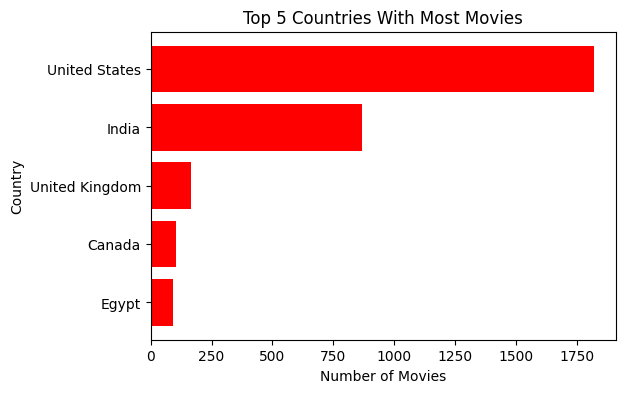

In [37]:
plt.figure(figsize=(6,4))
plt.barh(top_countries[::-1].index,top_countries[::-1].values,color = 'Red')
plt.title("Top 5 Countries With Most Movies")
plt.xlabel("Number of Movies")
plt.ylabel("Country")
plt.show()

In [42]:
countries_with_TVShows = df_copy.groupby('country')['type'].apply(lambda x : (x == 'TV Show').sum()).sort_values(ascending=False)
countries_with_TVShows[:5]

country
United States     27
United Kingdom    19
Japan             10
South Korea       10
India              7
Name: type, dtype: int64

In [43]:
top_countries_with_most_shows = countries_with_TVShows[:5]
top_countries_with_most_shows

country
United States     27
United Kingdom    19
Japan             10
South Korea       10
India              7
Name: type, dtype: int64

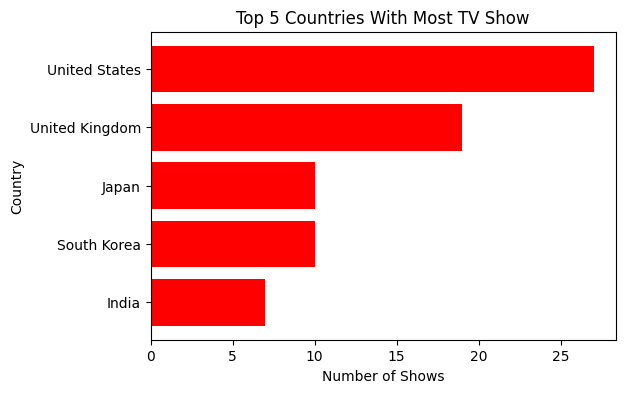

In [48]:
plt.figure(figsize=(6,4))
plt.barh(top_countries_with_most_shows[::-1].index,top_countries_with_most_shows[::-1].values,color= 'Red')
plt.title("Top 5 Countries With Most TV Show")
plt.xlabel("Number of Shows")
plt.ylabel("Country")
plt.show()

In [55]:
movies = df_copy[df_copy['type'] == 'Movie'].copy()
movies.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...


In [74]:
movies['duration'] = movies['duration'].astype(str).str.replace(' min','',regex=True).replace('nan',np.nan).astype(float).astype('int64')


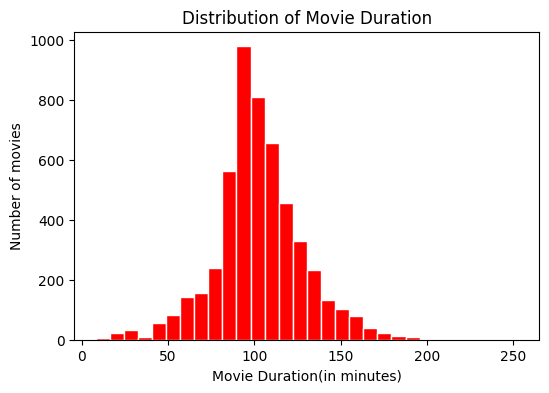

In [73]:
plt.figure(figsize=(6,4))
plt.hist(movies['duration'],bins = 30,color='red',edgecolor='white')
plt.title("Distribution of Movie Duration")
plt.xlabel("Movie Duration(in minutes)")
plt.ylabel("Number of movies")
plt.show()

In [80]:
TVShow = df_copy[df_copy['type'] == 'TV Show'].copy()
TVShow.shape

(147, 12)

In [88]:
TVShow['duration'] = TVShow['duration'].astype(str).str.replace('Season','',regex=True).astype(float).astype('int64')
TVShow['duration'].head()

8      9
198    1
273    1
276    2
297    1
Name: duration, dtype: int64

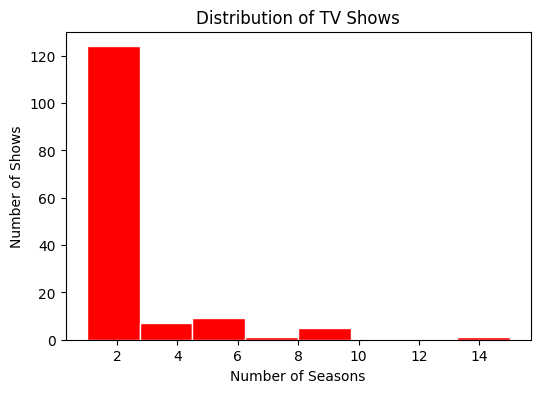

In [94]:
plt.figure(figsize = (6,4))
plt.hist(TVShow['duration'],bins = 8,color='red',edgecolor='white')
plt.title("Distribution of TV Shows")
plt.xlabel("Number of Seasons")
plt.ylabel("Number of Shows")
plt.show()

In [99]:
type_count = df_copy['type'].value_counts()

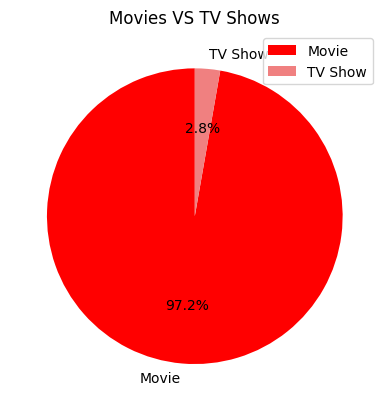

In [106]:
plt.pie(type_count,labels = type_count.index,autopct='%1.1f%%',colors=['red','lightcoral'],startangle= 90)
plt.legend()
plt.title("Movies VS TV Shows")
plt.show()

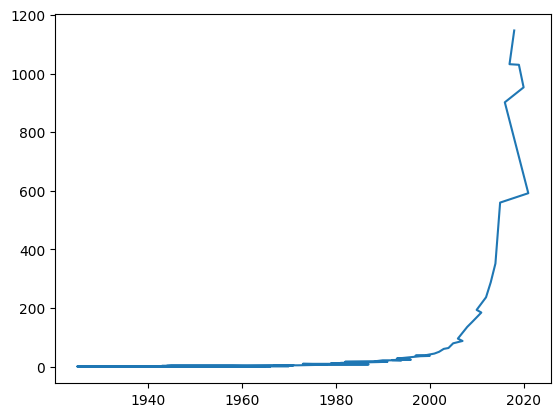

In [119]:
plt.plot(df['release_year'].value_counts())
plt.show()

country                                              type   
, France, Algeria                                    Movie       1
Argentina                                            Movie      34
                                                     TV Show     1
Argentina, Brazil, France, Poland, Germany, Denmark  Movie       1
Argentina, Chile                                     Movie       2
                                                                ..
Uruguay, Guatemala                                   Movie       1
Uruguay, Spain, Mexico                               Movie       1
Venezuela                                            Movie       1
Vietnam                                              Movie       7
Zimbabwe                                             Movie       1
Name: count, Length: 637, dtype: int64